# Stock Market Analysis 

The given dataset is a rich resource for performing in-depth quantitative analysis, offering comprehensive insights into
market trends and stock behaviour. Key characteristics of the dataset are:

Ticker: A unique symbol for each stock (e.g., AAPL for Apple).
Date: The trading day’s date.
Open: The price when the stock market opened.
High: The highest price the stock reached that day.
Low: The lowest price the stock fell to that day.
Close: The price when the stock market closed.
Adj Close: Adjusted closing price, including effects of splits or dividends.
Volume: Total number of shares traded that day.

Your task is to perform quantitative analysis to gain a deeper understanding of stock market dynamics and to inform 
investment strategies. 

The specific goals include:

Trend Analysis: Identifying long-term trends in stock prices and market movements.
Volatility Assessment: Evaluating the stability and risk associated with different stocks based on their price fluctuations.
Correlation Study: Investigating how different stocks correlate with each other, understanding market segments and 
diversification opportunities.
Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding 
in portfolio management.

# Initial steps :
# 1. Load the dataset
# 2. Examine the dataset using df.info()/ df.heads() / df.tails() / df.describe()
# 3. Check for missing or invalid values 

In [3]:
# Loading the dataset Stock Market analysis.csv
import pandas as pd
df=pd.read_csv(r'C:\Users\Tanvi\Desktop\Datasets\Stock Market analysis.csv')
df.head() # df.head(size / will return 5 rows by default)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,07-02-2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,08-02-2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,09-02-2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,10-02-2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,13-02-2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
df.info() # The df.info() will return the dtype,column attributes,not null count,
# memory usage and range index which will give the total number of entries in the dataset

# Observation for df.info(): The returned output shows that there are total 248 entries in the dataset and all of them are
#  not_null. What I observed here is that the Date field has its Dtype as object ,in further steps I will need to change it to
#  date type as this will make my analysis simpler. 

print(df.isnull().sum())  # This will return the count of Null values in the dataset which is indeed 0 in this case 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Changing the Dtype of Date column to Datetime
df['Date']=pd.to_datetime(df['Date'])


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_20260\3233367190.py:2: UserWarning: Parsing '13-02-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_20260\3233367190.py:2: UserWarning: Parsing '14-02-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_20260\3233367190.py:2: UserWarning: Parsing '15-02-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_20260\3233367190.py:2: UserWarning: Parsing '16-02-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Tanvi\AppData\Local\Temp\ipyker

In [6]:
# Now if we check the Data type of the Date column , it has been updated to datetime successfully. 
print(df['Date'].dtype)

datetime64[ns]


In [7]:
# Check if there are any Duplicates . This will be done using the pd.isduplicated() method . This method returns boolean result
# True/ False for each row and will return aonly the first and the last 5 rows.SO to view all rows we did 
# df[df.duplicated(keep=False)]. If keep='false', it only marks duplicates after the first occurrence as True

duplicates=df[df.duplicated(keep=False)]
print(duplicates)

# Observation : The output is an empty dataframe. This means that there are no duplicates in the dataframe. 

Empty DataFrame
Columns: [Ticker, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


# Performing Trend Analysis : I will analyze how the stock price changes over time. 

# In this part I will be analysing the stock price movements using the Open, Close, High, and Low columns to study daily price changes and trends.

In [8]:
# Calculating the daily change in stock prices / fluctuations
df['Daily_stock_movements']=df['High']-df['Low']

# Calculating the trend/direction of the stock price whether closing price of the stock is higher/lower than its Opening price
df['Price_direction']=df['Close']-df['Open']

#printing the first 5 rows of the dataset to check the date , Daily_stock_movements and Price_direction for that day
print(df[['Ticker','Date','Daily_stock_movements','Price_direction']].head())

# Observation : The Daily_stock_movements show significant fluctions. Another thing I observed here is that the Price_direction
# values show a down trends/ negative values which means the CLosing price was lower that the Opening price of that stock
# for that particular day


  Ticker       Date  Daily_stock_movements  Price_direction
0   AAPL 2023-07-02               4.589996         4.009995
1   AAPL 2023-08-02               3.410004        -1.960007
2   AAPL 2023-09-02               3.910004        -2.910004
3   AAPL 2023-10-02               2.119995         1.549988
4   AAPL 2023-02-13               3.339996         2.900009


Counting The Total number of Up trend and Down trend prices for the analysis
To count the total number of up/down trends, I will first need to filter he data based on whether Price Direction is 
positive (uptrend) or negative (downtrend). to filter data based on conditions like uptrend or downtrend, I can use a
boolean mask or conditional statements.

Masking is a way of filtering or selecting data based on a condition. 
Boolean Mask: A condition that returns True or False for each row based on your criteria.
You can then use this mask to filter the rows in your DataFrame.

In [9]:
# Creating a mask for up trend price_direction and filtering the rows into a new dataframe
mask_up=df['Price_direction']>0
up_trend=df[mask_up]
print(up_trend[['Ticker','Date','Price_direction']].head())

# Creating a mask for down trend price_direction 
mask_down=df['Price_direction']<0
down_trend=df[mask_down]
print(down_trend[['Ticker','Date','Price_direction']].head())

#Observation : The mask has been applied succesfully and the rows is now filtered into two dataframes up_trend and down_trend. 

  Ticker       Date  Price_direction
0   AAPL 2023-07-02         4.009995
3   AAPL 2023-10-02         1.549988
4   AAPL 2023-02-13         2.900009
5   AAPL 2023-02-14         1.080002
6   AAPL 2023-02-15         2.220001
   Ticker       Date  Price_direction
1    AAPL 2023-08-02        -1.960007
2    AAPL 2023-09-02        -2.910004
9    AAPL 2023-02-21        -1.720001
11   AAPL 2023-02-23        -0.690002
12   AAPL 2023-02-24        -0.399994


In [10]:
# Counting the total number of up_trend and down_trend values . 
count_up=up_trend.count().sum()  # count() will count the total number of not-null values for each column and
count_down=down_trend.count().sum()  # sum()  will get the total number of non-null values accross all columns

print(count_up)
print(count_down)

#Observation : There are total 1260 values in uptrend and 1220 in down_trend. 

1260
1220


# 1. Visualize Uptrend and Downtrend Days Over Time (Bar Chart)

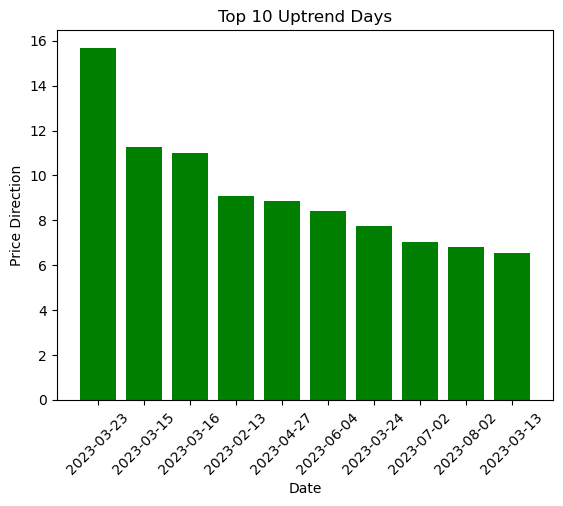

In [11]:
import matplotlib.pyplot as plt

# Sort up and down trend counts
sorted_up = up_trend.sort_values(by='Price_direction',ascending=False)
sorted_down = down_trend.sort_values(by='Price_direction',ascending=False)

# Get the top 10 up and down trends
top_up = sorted_up.head(10)
top_down = sorted_down.head(10)

# Extract the relevant data
top_up_values = top_up['Price_direction']
top_up.index = top_up['Date'].dt.strftime('%Y-%m-%d')  # Format dates for better readability

# The .dt.strftime('%Y-%m-%d') method formats a datetime column into a string format for better readability:
# %Y: Year (e.g., 2023)
# %m: Month (e.g., 01 for January)
# %d: Day (e.g., 15)
# It converts a date like 2023-01-15 00:00:00 into 2023-01-15.

# Plot a bar graph for the Top 10 up trends
plt.bar(top_up.index, top_up_values, color='green', label='Top Uptrend')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price Direction')
plt.title('Top 10 Uptrend Days')
plt.show()



## Observation : 
The highest positive price direction occurred on 2023-03-23, indicating that on this day,
the closing price was significantly higher than the opening price for different stocks. The price direction showed a 
decline starting from 2023-03-25, and after that, the upward movement gradually weakened. The lowest positive price direction
was on 2023-03-13, representing the weakest upward trend during this period. This indicates that on 2023-03-13, fewer stocks
had their closing price greater than their opening price.

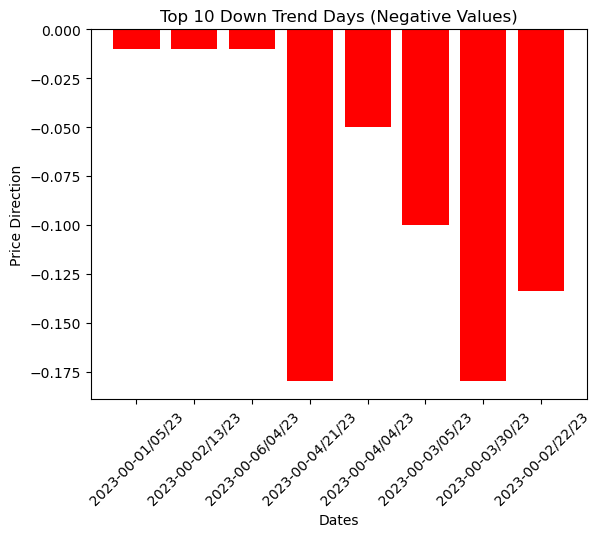

In [12]:
#Plotting a bar graph got the Top 10 Down Trends
top_down_values=top_down['Price_direction']
top_down.index=top_down['Date'].dt.strftime('%Y-%M-%D')

plt.bar(top_down.index,top_down_values,color='red',label='Top Downtrend')
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Price Direction')
plt.title('Top 10 Down Trend Days (Negative Values)')
plt.show()

# This graph is inverted because the values in Down Trend Price_direction Column are Negative . To fix this issue I will need 
# to take the ABS values of Price Direction .

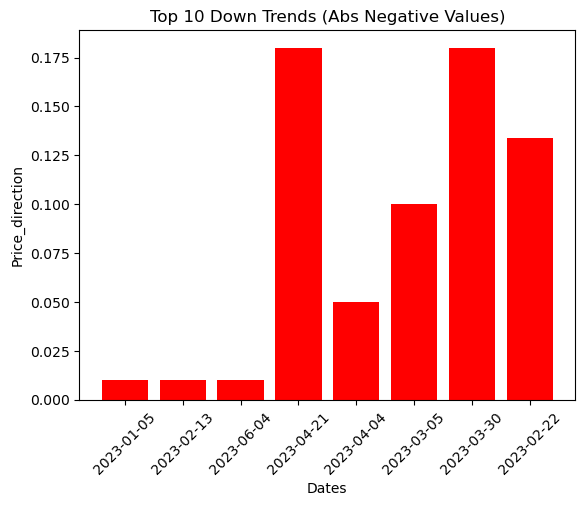

In [13]:
# Taking the abs values of Price_direction column and plotting the bar graph again

top_down_values=top_down['Price_direction'].abs()  #abs returns a positive value
top_down_index=top_down['Date'].dt.strftime('%Y-%m-%d')

# Plotting the bar graph 
plt.bar(top_down_index,top_down_values,color='red',label='Top Down Trends')
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Price_direction')
plt.title('Top 10 Down Trends (Abs Negative Values)')
plt.show()

# As compared to the above graph which was inversed , this graph gives much more clarity.


## Observation:
The most significant negative price direction occurred on 2023-04-21 and 2023-03-30, indicating that on these dates
the closing prices were substantially lower than the opening prices across various stocks. The least negative price direction
was observed on 2023-01-05, 2023-02-13, and 2023-06-04. After that, a sharp decline in the price direction began around 
2023-04-21, with no significant recovery. Following 2023-03-22, the downward trend slightly persisted.

# 2. Plot Closing Price Over Time with Uptrend/Downtrend Annotations

Key components of a candlestick:
Open: The price at which a security opens for the trading period.
Close: The price at which a security closes for the trading period.
High: The highest price reached during the trading period.
Low: The lowest price reached during the trading period.
Body: The thick part of the candlestick, representing the range between the open and close prices.
Wick (or Shadow): The thin line extending from the body, showing the range between the high and low prices.
Types of candles:
Green Candle (Bullish Candle):
Indicates that the closing price is higher than the opening price.
Shows that the buyers (bulls) were in control, driving the price upward.
Called a "bullish" candle.
Red Candle (Bearish Candle):
Indicates that the closing price is lower than the opening price.
Shows that the sellers (bears) were in control, pushing the price downward.
Called a "bearish" candle.
Bulls vs. Bears:
Bulls: Investors who believe the price of an asset will go up (they want to buy).
Bears: Investors who believe the price of an asset will go down (they want to sell).
In summary:

Green candles represent an increase in price (bullish).
Red candles represent a decrease in price (bearish).



In [14]:
!pip install mplfinance

                  Open        High         Low       Close
Date                                                      
2023-05-07  164.740005  345.429993  104.101997  106.214996


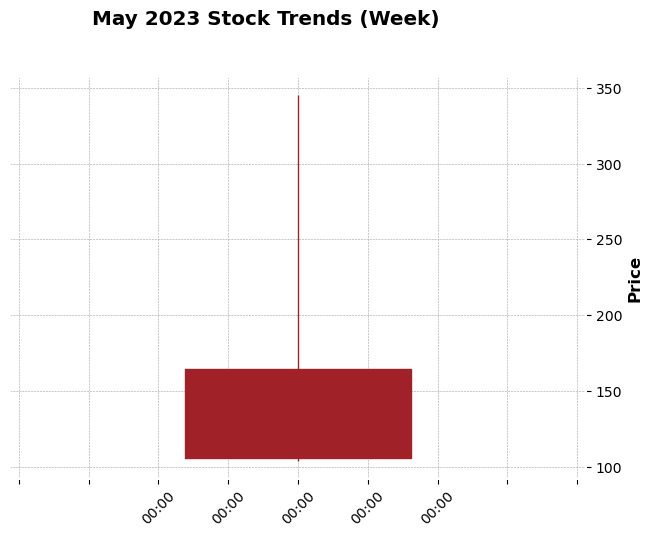

In [22]:
import mplfinance as mpf
import pandas as pd

df['Date']=pd.to_datetime(df['Date'])
may_2023=df[(df['Date'].dt.month==5)& (df['Date'].dt.year==2023)]  # Filter data for MAy 2023. dt Accessor ensures to correctly
#handle the date time attributes.


may_2023.set_index('Date',inplace=True) #Set 'Date' as the index of the DataFrame to plot the time series correctly.

#Resampling data means grouping it by a specific time interval (e.g., weekly, monthly) and aggregating it into a summary, 
#which simplifies visualization. For a candlestick chart, we typically use these aggregates:

#Open: First value of the interval.
#High: Maximum value.
#Low: Minimum value.
#Close: Last value of the interval.
resampled_data=may_2023.resample('W').agg({'Open':'first','High':'max','Low':'min','Close':'last'})
# Here I used weekly time interval since the daily time interval of a MOnth would look too cluttered.

print(resampled_data)

mpf.plot(resampled_data,type='candle',style='charles',title="May 2023 Stock Trends (Week)", ylabel="Price")



## Observation:
Looking at these candlesticks, I notice a shooting star pattern. This means that the stock opened at a lower price, moved up during the day or week, but couldn’t keep those higher levels and ended near or below where it started. That suggests more selling pressure, potentially signalling a downward reversal. For May, there’s only one large candle, which tells me there wasn’t much day-to-day price movement—so all the data for that month is basically squished into that single candle.

# Errors faced while executing below Cell :
So first I tried to plot a candle chart of the month of May . 
It came out to be as an inverted hammer . In the code of that chart I had already set the Date column as index 
Now I want to take another Sample from the dataframe . That sample will be the data from month of Feb .
So now what the problem is , the Date column has already been set as index in the previous cell of my Jupyter notebook .
So now the Data frame has Changed . So I will have to again reset this Date column as a Column of the dataframe and again
I will have to set is as the index and then plot the candle chart. 

This issue was giving me an Error saying that the Date column does not exist in the dataframe which is indeed true because I 
set it as index before. So to resolve this I had  to convert the Date index back to a column in the dataframe using
reset_index(), then set it again as the index for the new sample . 

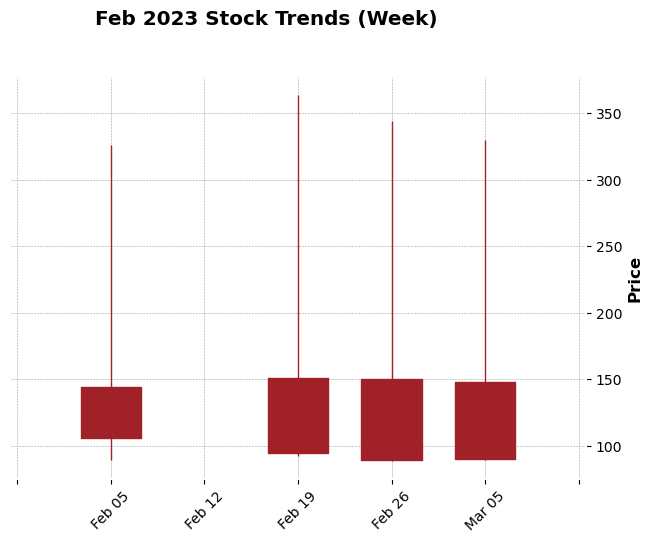

In [21]:
import pandas as pd
import mplfinance as mpf
df = df.reset_index()
# Filter for February 2023
feb_2023 = df[(df['Date'].dt.month == 2) & (df['Date'].dt.year == 2023)]
feb_2023.set_index('Date', inplace=True)

# Resample data by week
resampled_data2 = feb_2023.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})

# Plot candlestick chart
mpf.plot(resampled_data2, type='candle', style='charles', title="Feb 2023 Stock Trends (Week)", ylabel="Price")    



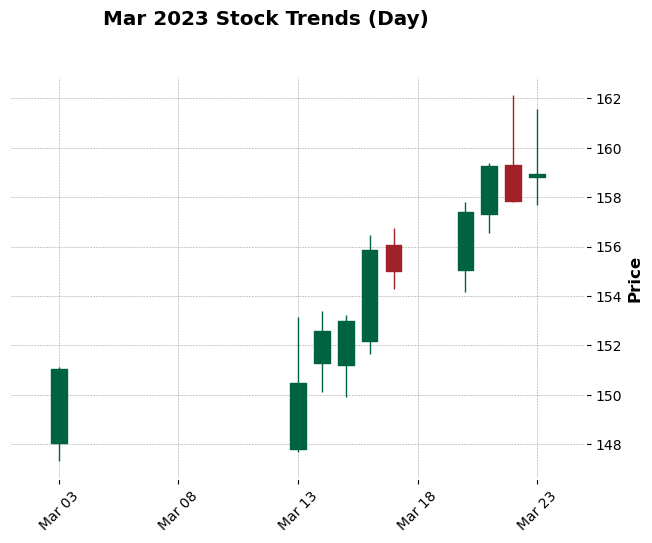

In [20]:
import mplfinance as mpf
import pandas as pd
df=df.reset_index(drop=True)

Mar_2023=df[(df['Date'].dt.month==3)&(df['Date'].dt.year==2023)]
top_10=Mar_2023.head(10)

top_10.set_index('Date',inplace=True)

resampled_data3=top_10.resample('D').agg({'Open':'first','High':'max','Low':'min','Close':'last'})
mpf.plot(resampled_data3,type='candle',style='charles',title="Mar 2023 Stock Trends (Day)", ylabel="Price")




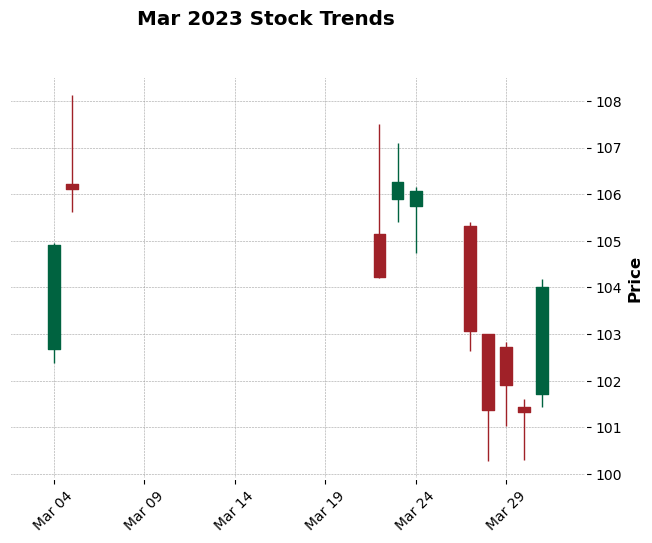

In [18]:
import mplfinance as mpf
import pandas as pd
df=df.reset_index(drop=True)

Mar_2023=df[(df['Date'].dt.month==3)&(df['Date'].dt.year==2023)]
top_10=Mar_2023.tail(10)

top_10.set_index('Date',inplace=True)

resampled_data3=top_10.resample('D').agg({'Open':'first','High':'max','Low':'min','Close':'last'})
mpf.plot(resampled_data3,type='candle',style='charles',title="Mar 2023 Stock Trends", ylabel="Price")


## Observation:
From this candlestick chart for March 2023, I notice that the stock starts with a few green candles, meaning the closing price is higher than the opening price on those days. Then, the chart switches between red and green candles, indicating some days ended lower (red) while others ended higher (green). By the end of the month, the price dips below 102, suggesting a bit more selling pressure. Overall, the stock’s price mostly stays in the 101–108 range, showing moderate ups and downs in the month of March 2023.
